In [37]:
from utils import load_mnist
from sklearn import manifold
from matplotlib import offsetbox

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

In [38]:
x_train, _, y_train, _ = load_mnist(permutation=True, train_size=1000, test_size=100)
#map y_train to int instead of string
y_train = list(map(int, y_train))

* Loading MNIST Dataset
* Loaded MNIST Dataset


In [44]:
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(12, 12))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [63]:
model = manifold.LocallyLinearEmbedding(n_neighbors=80, n_components=3, method='modified', eigen_solver='auto')

In [64]:
X_hlle = model.fit_transform(x_train)
print('Reconstruction Error: {:.02f}'.format(model.reconstruction_error_))

Reconstruction Error: 18.80


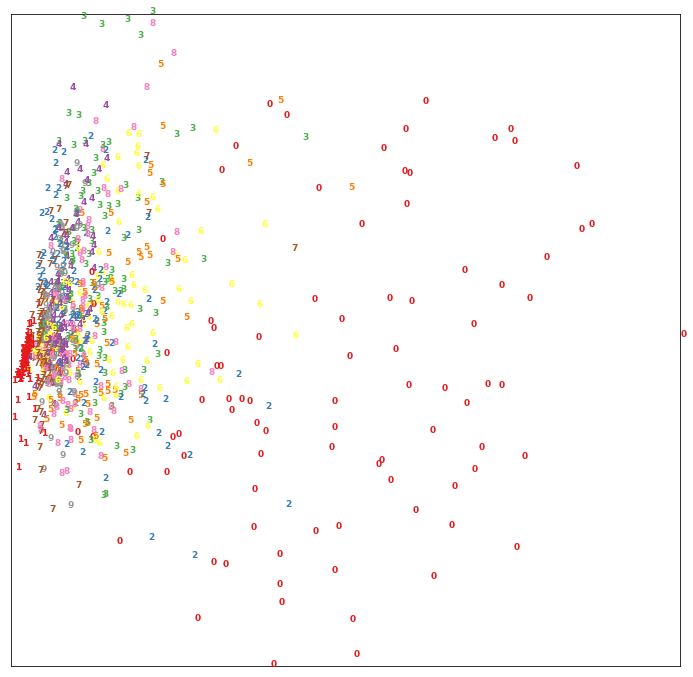

In [65]:
plot_embedding(X_hlle, y_train)

In [66]:
print(X_hlle.shape)

(1000, 3)
